In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

/home/goji/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
def extract_positions_from_log(file_path, field):
    positions = []

    # Regex to match the [POS] line and extract x, y, z as floats
    pattern = re.compile(rf"\[{field}\]\[([-\d.eE]+)d,([-\d.eE]+)d,([-\d.eE]+)d\]")

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                x, y, z = map(float, match.groups())
                positions.append((x, y, z))
    return np.array(positions)

In [4]:
positions = extract_positions_from_log("../data/movements/sprint.log", "xyz")
velocities = extract_positions_from_log("../data/movements/sprint.log", "vel")

y = positions[:, 1]

diffs = np.diff(positions, axis=0)

vy = diffs[:, 1]
vh = np.linalg.norm(diffs[:, [0, 2]], axis=1)

vvy = velocities[:, 1]
vvh = np.linalg.norm(velocities[:, [0, 2]], axis=1)

print(vvy)

print(np.mean(vh), np.mean(vvh))

[-0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784
 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784
 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784
 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784
 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784
 -0.0784 -0.0784 -0.0784 -0.0784 -0.0784]
0.25082192928503133 0.0


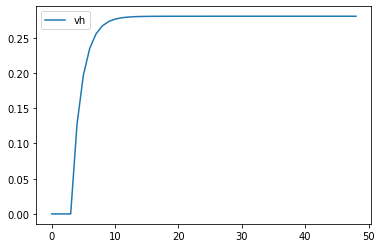

In [5]:
plt.plot(np.arange(len(vh)), vh, label="vh")
plt.legend()

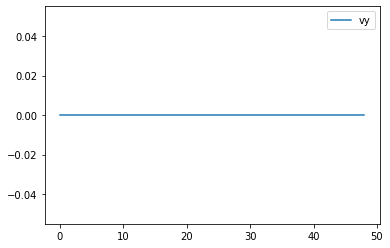

In [6]:
plt.plot(np.arange(len(vy)), vy, label="vy")
plt.legend()

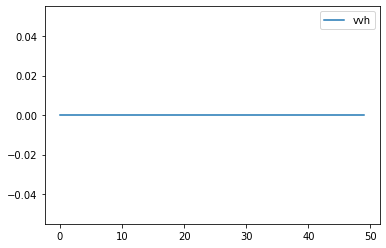

In [7]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh")
plt.legend()

-0.07840000152587889


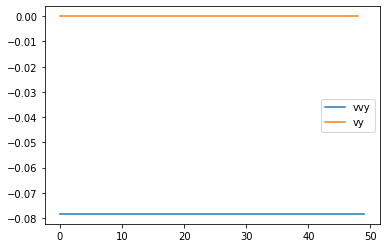

In [8]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vy)), vy, label="vy")

plt.legend()
print(np.mean(vvy))

In [24]:
# simulate sprint jumping 


g_ground = 0.0784
g_up = 0.0828
g_down = 0.075

jump_strength = 0.415 + g_up

sprint_speed = 0.28

base_jump_boost = 0.24
jump_boost_rel = 0.32
air_fric_rel = 0.14
jump_boost = 0.2
air_fric = 0.3
air_fric_ground = 1.5
air_fric_ground_rel = 5

sprint_accel = 0.0971 * 1.3
walk_air_accel = 0.0197
sprint_air_accel = walk_air_accel * 1.3

sim_y = y[0] + 60
sim_vy = vvy[0]
sim_vx = vh[0]
sim_vvx = vvh[0]

ys = [sim_y]
vys = [sim_vy]
vxs = [sim_vx]
vvxs = [sim_vvx]

for t in range(1, len(vh)):
    
    if sim_y > 0:
        sim_vx -= air_fric_rel * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric * (np.abs(sim_vvx)) * 0.3
    else:
        sim_vx -= air_fric_ground_rel * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric_ground * (np.abs(sim_vvx)) * 0.3
    
    
    if vh[t] > 0:
        sim_vvx += sprint_accel

    if sim_vy > 0:
        g = g_up
    else:
        g = g_down
        
        
    sim_vy -= g
    
    sim_y = np.maximum(sim_y + sim_vy, 0)
    
    if t > 1 and t + 1 < len(vvy) and  vvy[t+1] > 0.4:   
        sim_vx += jump_boost_rel
    
    if sim_y == 0 and vvy[t] < 0.4:
        sim_vy = -g_down
        
    

    
    ys.append(sim_y)
    vys.append(sim_vy)
    
    vxs.append(sim_vx)
    vvxs.append(sim_vvx)
    

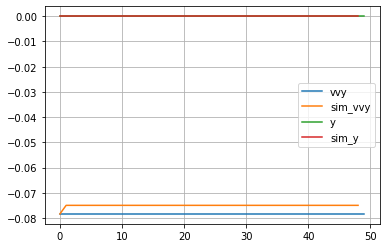

In [25]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vys)), vys, label="sim_vvy")
plt.plot(np.arange(len(y)), y+60, label="y")
plt.plot(np.arange(len(ys)), ys, label="sim_y")
#plt.hlines(-g_ground, 0, 37)
plt.grid()

plt.legend()


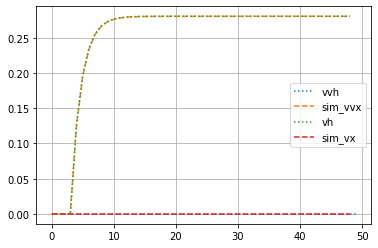

In [26]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh", linestyle=":")
plt.plot(np.arange(len(vvxs)), vvxs, label="sim_vvx", linestyle="--")
plt.plot(np.arange(len(vh)), vh, label="vh", linestyle=":")
plt.plot(np.arange(len(vxs)), vxs, label="sim_vx", linestyle="--")

plt.grid()

plt.legend()